In [1]:
import pandas as pd 
import edhec_risk_kit as erk
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Deviation from normality

In [4]:
hfi = erk.get_hfi_returns()
hfi = hfi["2009":"2019"]
print(hfi.index)
hfi.head()

DatetimeIndex(['2009-01-31', '2009-02-28', '2009-03-31', '2009-04-30',
               '2009-05-31', '2009-06-30', '2009-07-31', '2009-08-31',
               '2009-09-30', '2009-10-31',
               ...
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
               '2018-10-31', '2018-11-30'],
              dtype='datetime64[ns]', name='date', length=119, freq=None)


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2009-01-31,0.0491,-0.0016,0.0082,-0.0112,0.0079,0.0132,0.0112,0.0029,-0.0017,0.0056,0.0100,0.0282,0.0060
2009-02-28,0.0164,-0.0031,-0.0122,-0.0133,-0.0046,-0.0091,0.0065,-0.0055,-0.0161,0.0006,-0.0016,0.0328,-0.0037
2009-03-31,0.0235,-0.0180,0.0022,0.0350,0.0021,0.0117,0.0057,0.0048,0.0188,0.0125,0.0100,-0.0462,0.0008
2009-04-30,0.0500,-0.0140,0.0387,0.0663,-0.0012,0.0337,0.0221,0.0127,0.0375,0.0081,0.0342,-0.0820,0.0092
2009-05-31,0.0578,0.0213,0.0504,0.0884,0.0146,0.0442,0.0365,0.0348,0.0516,0.0107,0.0392,0.0008,0.0312


In [6]:
erk.kurtosis(hfi)

Convertible Arbitrage     6.775731
CTA Global                2.591087
Distressed Securities     3.319725
Emerging Markets          4.401636
Equity Market Neutral     5.071677
Event Driven              3.620617
Fixed Income Arbitrage    6.406941
Global Macro              3.164362
Long/Short Equity         4.115713
Merger Arbitrage          2.715238
Relative Value            4.512482
Short Selling             4.175832
Funds Of Funds            3.816132
dtype: float64

In [5]:
pd.concat([hfi.mean(), hfi.median(), hfi.mean() > hfi.median()], axis="columns")

,0,1,2
Convertible Arbitrage,0.006623,0.0045,True
CTA Global,0.000497,-0.0003,True
Distressed Securities,0.006559,0.0082,False
Emerging Markets,0.005205,0.0061,False
Equity Market Neutral,0.002556,0.0032,False
Event Driven,0.005595,0.0070,False
Fixed Income Arbitrage,0.005478,0.0050,True
Global Macro,0.002676,0.0020,True
Long/Short Equity,0.005209,0.0064,False
Merger Arbitrage,0.003716,0.0047,False


In [43]:
erk.skewness(hfi).sort_values()

Equity Market Neutral    -0.896327
Funds Of Funds           -0.646908
Merger Arbitrage         -0.551065
Event Driven             -0.488821
Long/Short Equity        -0.463703
Distressed Securities    -0.254944
Emerging Markets          0.033123
CTA Global                0.052062
Relative Value            0.159953
Global Macro              0.348184
Short Selling             0.456518
Fixed Income Arbitrage    1.121453
Convertible Arbitrage     1.305911
dtype: float64

## Semi-Deviation

In [9]:
hfi.std(ddof=0) *100

Convertible Arbitrage     1.363528
CTA Global                1.975907
Distressed Securities     1.572463
Emerging Markets          2.346084
Equity Market Neutral     0.616355
Event Driven              1.465079
Fixed Income Arbitrage    0.761656
Global Macro              1.033711
Long/Short Equity         1.683653
Merger Arbitrage          0.644078
Relative Value            0.947002
Short Selling             3.416113
Funds Of Funds            1.069121
dtype: float64

In [10]:
# isn't merger arbiteraj and short selling 

In [5]:
hfi[hfi<0].std(ddof=-0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [35]:
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

## VaR & CVaR

Value At Risk
- Historic VaR
- Parametric VaR - Gaussian
- Modified Cornish-Fisher  VaR

In [11]:
import numpy as np 

In [12]:
np.percentile(hfi, 5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [17]:
def var_historic(r, level=5):
    """var Historic"""
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be Series or Dataframe ")
        

In [18]:
var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [19]:
from scipy.stats import norm

In [25]:
z = norm.ppf(0.05)

In [29]:
-(hfi.mean() + z* hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

<AxesSubplot:title={'center':'EDHEC Hedge fund Indicated:VaR'}>

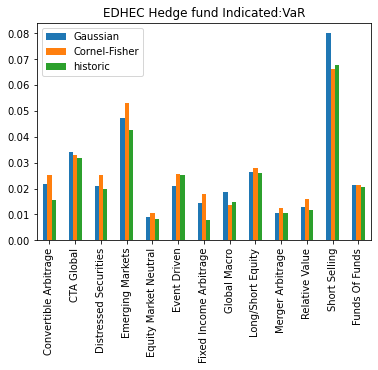

In [33]:
var_list = [erk.var_gaussian(hfi), erk.var_gaussian(hfi, cf=True), erk.var_historic(hfi)]
comparition = pd.concat(var_list, axis=1)
comparition.columns = ["Gaussian", "Cornel-Fisher", "historic"]
comparition.plot.bar(title="EDHEC Hedge fund Indicated:VaR")